# Introduction to ML Concepts and Scikit-Learn

This notebook is a brief introduction to Machine Learning and Sckit-Learn.

We are going to work on the [SMS Spam Dataset @ UCI](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) as a starter to check the basic ML pipeline with Scikit-Learn. The dataset labels an SMS text as `spam` or `ham`; additionally we have the SMS length and how many punctuation symbols were used. Steps: 

- First, we are going to predict `ham`/`spam` only with the numerical features of `length` and `punct` in the present notebook. However, these values are not enough to predict significantly better than random guesses.
- Then, we're going to extract features from the text in the next notebook.

Overview of contents:

1. ML Concepts - A Refresher: Supervised vs. Unsupervised ML, Performance Metrics of Regression, Performance Metrics of Classification (Accuracy, Precision, Recall, F1, Confusion Matrix).
2. Scikit-Learn Pipeline with SMS Spam Use Case
    - 2.1 Explore the Dataset: Target & Predictors
        - Target: Ham/Spam
        - Predictor 1: Length
        - Predictor 2: Punctuation
    - 2.2 Train/Test Split
    - 2.3 Define, Train & Evaluate Classification Models
        - Logistic Regression: Model Training
        - Logistic Regression: Model Metrics / Evaluation
        - Naive Bayes: Model Training
        - Naive Bayes: Model Metrics / Evaluation
        - Support Vector Machines: Model Training
        - Support Vector Machines: Model Metrics / Evaluation


*Diclaimer: I made this notebook while following the Udemy course [NLP - Natural Language Processing with Python](https://www.udemy.com/course/nlp-natural-language-processing-with-python/) by José Marcial Portilla. The original course notebooks and materials were provided with a download link, I haven't found a repository to fork from.*

## 1. ML Concepts - A Refresher

### Types of Machine Learning

Most of machine learning techniques are divided in these groups:

- Supervised Learning: regression and classification with labelled data
- Unsupervised Learning: clustering, anomaly detection and dimenstionality reduction with unlabelled data
- Reinforcement Learning: learning through actions with the environment.

### Supervised learning

We have labelled or annotated samples, which are split
- Training split: train model parameters.
- Validation split: for adjusting hyperparameters (skipped in the course).
- Test split: final performance metric; nothing tested anymore.

Usually two types of problems are solved:
- Classification: predict the class of a new sample using a model trained with labelled samples.
- Regression: predict the continuous value of a sample using a model trained with labelled samples.

### Unsupervised learning
We don't have labelled data.
Usually these kind of problems are solved:
- Clustering: data points are grouped due to their similarity; since data is not labelled, the grouping can result to be artificial, if not correctly done.
- Anomaly detection: we detect outliers in a dataset, eg, fraud detection; usually we don't have outliers as data, but we recognize them when they appear.
- Dimensionality reduction: the number of features of each sample can be reduced either to compress or to better understand the dataset.

Since we don't have labels (ground truth), we cannot evaluate the methods that easily.

### Performance evaulation for regression (continuous values)

- Mean absolute error: `avg(abs(y-y_hat))`; large errors not punished
- (Root) Mean squared error: `sqrt(avg((y-y_hat)^2))`

### Performance evaluation for classification (categorical values)

**Metrics**
- Accuracy = correct predictions / total predictions `= (TP + TN) / (TP + TN + FP + FN)`
    - Accuracy is good for balanced datasets = datasets that contain a similar amount of samples for each class
    - Why? because if we have a dataset with 99% dogs, the accuracy is surely going to be good by guessing a dog!
    - The reverse of the accuracy is the Error Rate = Missclassification Rate: `(FP + FN) / (TP + TN + FP + FN)`

- Recall = correct T predictions / all real T samples `= TP / (TP + FN)`
    - The ability of a model to find all relevant classesfrom all real T cases, how many are predicted correctly as T?

- Precission = correct T predictions / all predicted T samples `= TP / (TP + FP)`
    - The ability of a model to identify only the relevant data points from all predicted T cases, how many are correctly/really T?
    - We have often a trade-off between Precission & Recall

- F1-core `= 2 * (precission * recall) / (precission + recall)`
    - It combines both precission & recall, it is the harmonic mean of both
    - The harmonic mean is typically used when the average of rates is desired
    - It punishes bad rates/values at the extremes, leading to a bad F1-score

**Confusion matrix (Type I & II errors)**

- Real/Actual (T or F) vs Prediction (T or F)
- Quadrants:
    - TP
    - FN - type II error: these are the really severe errors we'd like to avoid!
    - FP - type I error
    - TN
- From this matrix, we can compute many metrics, among them the ones defined: Accuracy, Precission, Recall, F1-score

[Confusion Matrix from the Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

![Confusion Matrix (Wikipedia)](../pics/confusion_matrix.png)

For each example, we need to pick the most appropriate metric and choose the most appropriate threshold for considering the model performs correctly enough. It's not the same predicting
- diseases, severe or light
- defects
- ...

## 2. Scikit-Learn Pipeline with SMS Spam Use Case

We are going to work on the [SMS Spam Dataset @ UCI](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) as a starter to check the basic ML pipeline with Scikit-Learn. The dataset labels an SMS text as `spam` or `ham`; additionally we have the SMS length and how many punctuation symbols were used. Steps: 

- First, we are going to predict `ham`/`spam` only with the numerical features of `length` and `punct` in the present notebook. However, these values are not enough to predict significantly better than random guesses.
- Then, we're going to extract features from the text in the next notebook.

### 2.1 Explore the Dataset: Target & Predictors

In [1]:
import numpy as np
import pandas as pd

In [22]:
# Load dataset; watch out: TAB separated values
df = pd.read_csv('../data/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [37]:
# ALWAYS check for missing values: none present
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

#### Target: `Ham/Spam`

In [5]:
# Number of SMS
len(df)

5572

In [10]:
# Check target unique values
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
# Count target values: it is quite unbalanced
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [23]:
# To beat random chance, we need to get better accuracy than 86.5%!
df['label'].value_counts()[0]/len(df)

0.8659368269921034

#### Predictor 1: Length

In [15]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<AxesSubplot:>

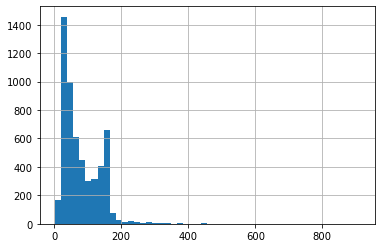

In [18]:
# The dataset length value is very skewed
df['length'].hist(bins=50)

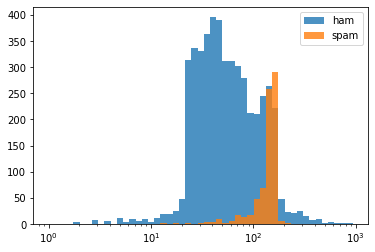

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot with logarithmic scale, for both target classes
# We see that the distirbutions are distinct for both classes
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

#### Predictor 2: Punctuation

In [24]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

<AxesSubplot:>

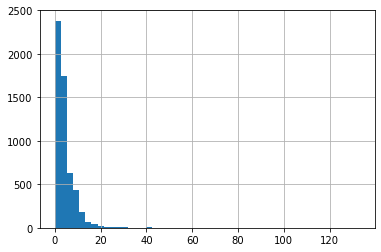

In [26]:
# The dataset punct value is also very skewed
df['punct'].hist(bins=50)

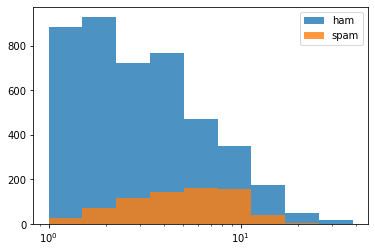

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot with logarithmic scale, for both target classes
# We see that the distirbutions are distinct for both classes, but they overlap considerably
plt.xscale('log')
bins = 1.5**(np.arange(0,10))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

### 2.2 Train/Test Split

In [42]:
# Create Feature and Label sets: X, y (convention)
# Features: either pick selected or drop the rest
# X = df.drop(['label','message'], axis=1)
X = df[['length','punct']]
y = df['label']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


### 2.3 Define, Train & Evaluate Classification Models

We are going to try 3 classification models:
- Logistic Regression
- Naive Bayes
- Support Vector Machines (SVM)

The syntax is always very similar:

```python
from sklearn.family import Model
model = Model(params=...)
model.fit(X_train, y_train)
```

#### Logistic Regression: Model Training

In [46]:
from sklearn.linear_model import LogisticRegression

# Chosen optimizer/solver: Limited-memory BFGS
lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression()

#### Logistic Regression: Model Metrics

In [52]:
from sklearn import metrics

# Create a prediction set
predictions = lr_model.predict(X_test)

# Print a confusion matrix
# THE RESULTS ARE TERRIBLY BAD!
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [48]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


In [49]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [53]:
# Print the overall accuracy
# TERRIBLY BAD: Random guess is better in this case
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348


#### Naive Bayes: Model Training

In [54]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

#### Naive Bayes: Model Metrics

In [59]:
# STILL TERRIBLE! No spam SMS detected!
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


In [60]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [57]:
print(metrics.accuracy_score(y_test,predictions))

0.8607939097335509


#### Support Vector Machines: Training the Model

In [61]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

#### Support Vector Machines: Model Metrics

In [69]:
# This model seems to work a bit better than the others
# But still slightly above random chance!
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


In [70]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



In [67]:
print(metrics.accuracy_score(y_test,predictions))

0.8863512778684067
